<a href="https://colab.research.google.com/github/arimitramaiti/notebooks/blob/master/Group3_Assignment3_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <center>Term Deposit Subscription Example in Jupyter</center>
<center>Machine Learning with Big Data (Week-3)</center>
<center>ePGD ABA 2020-21</center>

In [ ]:
!pip install --quiet feature_engine
!pip install --quiet feature_engine --upgrade --no-deps
!pip install --quiet sklearn
!pip install --quiet sklearn --upgrade --no-deps
!pip install --quiet xgboost

**CAUTION: This notebook may consume 15 minutes to finish the output computations**

**Group-3 includes : Nitin Raheja, Rohan Singh, Anand Dattani, Anand Aggarwal and Arimitra Maiti**

**Week-3 : Classification using Cost Matrix Exercise on Bank Data**

__Overall approach__

![](https://drive.google.com/uc?export=view&id=19oaW3c79KEUUfCh21LQVmi6LOjBvL2uQ)

**Q1) Build a suitable analytical model to assess whether a customer will subscribe to a term deposit or not. Evaluate your model performance.**

![](https://drive.google.com/uc?export=view&id=1eX1KdJGFJtLwgAtVd6X7ylg_8e17igfI)

**Q2) Perform model diagnostic investigation and suggest steps to improve the performance of your model.**

![](https://drive.google.com/uc?export=view&id=1QCR0FbqqFAjof7pebA5zPPLwyCrLrIVw)

**Q3) Suppose that you are given the following mis-classification matrix: What are the implications for your model? Explain with suitable data analysis steps.**

![](https://drive.google.com/uc?export=view&id=1K10Ph9-X64vChHSS3pR6gtnvhTjwQPmB)

**Q4) Design a customer targeting plan for improving term deposit subscription performance.**

![](https://drive.google.com/uc?export=view&id=1xG4S90ig3naXXzfG5ASYLpxTPiQ5eJA_)

**Q5) Suppose that you wish to apply your best predictive model on a new promotional campaign. The predictive model is required to be applied on 5000 hold-out customer instances. Assume that the promotional cost is 5 dollars per customer and the expected revenue is 30 dollars per customer.**

![](https://drive.google.com/uc?export=view&id=1BoPPvxlViqvkEqorDnP51GVvNEFoGFrt)

**What is the minimum marketing budget that you need to identify targets from your model so that you can maximize your profits?**

The minimum budget is $2500.00

**What is the maximum marketing budget that you need to achieve maximum reach of customers without incurring any loss?**

The maximum budget could be when 90% cumulative lift is assessed. The cost would be $22,500.00 dollars and the revenue would be positive because response would be a number greater than 0.10 which would then get multiplied by revenue per customer

In [ ]:
##Import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math

In [ ]:
##Import data
url = "https://raw.githubusercontent.com/arimitramaiti/datasets/master/Classification/bank-term-deposit-subscription.csv"
dataset = pd.read_csv(url, error_bad_lines = False, header=0, index_col=None)
dataset.head(4)

,age,occupation,maritalStatus,education,creditDefault,housingLoan,personalLoan,contactMode,month,dayOfWeek,duration,campaign,pdays,previous,poutcome,subscribed
0,54,housemaid,married,basic.9y,no,no,no,cellular,nov,wed,362,3,999,0,nonexistent,no
1,62,technician,married,unknown,no,no,no,cellular,mar,mon,105,2,999,0,nonexistent,no
2,58,unemployed,divorced,high.school,no,no,no,cellular,jul,mon,377,4,999,0,nonexistent,no
3,25,admin.,single,university.degree,no,yes,no,cellular,jul,thu,174,2,999,0,nonexistent,no


In [ ]:
##Check for missing values in the dataset
dataset.isnull().sum()/dataset.shape[0] * 100

age              0.0
occupation       0.0
maritalStatus    0.0
education        0.0
creditDefault    0.0
housingLoan      0.0
personalLoan     0.0
contactMode      0.0
month            0.0
dayOfWeek        0.0
duration         0.0
campaign         0.0
pdays            0.0
previous         0.0
poutcome         0.0
subscribed       0.0
dtype: float64

In [ ]:
dataset.subscribed.value_counts().sort_index()

no     2742
yes     348
Name: subscribed, dtype: int64

In [ ]:
for i in range(len(dataset.columns)):
    if dataset[dataset.columns[i]].dtype == 'object':
        mylist = dataset[dataset.columns[i]].unique()
        varname = dataset.columns[i]
        l = len(mylist)
        print(f"{varname} has {l} unique values which are as follows: \n {mylist}")

occupation has 12 unique values which are as follows: 
 ['housemaid' 'technician' 'unemployed' 'admin.' 'blue-collar' 'management'
 'services' 'entrepreneur' 'student' 'retired' 'self-employed' 'unknown']
maritalStatus has 4 unique values which are as follows: 
 ['married' 'divorced' 'single' 'unknown']
education has 8 unique values which are as follows: 
 ['basic.9y' 'unknown' 'high.school' 'university.degree' 'basic.4y'
 'professional.course' 'basic.6y' 'illiterate']
creditDefault has 2 unique values which are as follows: 
 ['no' 'unknown']
housingLoan has 3 unique values which are as follows: 
 ['no' 'yes' 'unknown']
personalLoan has 3 unique values which are as follows: 
 ['no' 'yes' 'unknown']
contactMode has 2 unique values which are as follows: 
 ['cellular' 'telephone']
month has 10 unique values which are as follows: 
 ['nov' 'mar' 'jul' 'may' 'jun' 'dec' 'oct' 'aug' 'sep' 'apr']
dayOfWeek has 5 unique values which are as follows: 
 ['wed' 'mon' 'thu' 'fri' 'tue']
poutcome has

In [ ]:
for i in range(len(dataset.columns)):
    if dataset[dataset.columns[i]].dtype != 'object':
        varname = dataset.columns[i]
        mylist = dataset[dataset.columns[i]].describe()
        print(f"{varname} is numeric and descriptive measures are as follows: \n {mylist}")

age is numeric and descriptive measures are as follows: 
 count    3090.000000
mean       40.203560
std        10.505775
min        17.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        98.000000
Name: age, dtype: float64
duration is numeric and descriptive measures are as follows: 
 count    3090.000000
mean      256.970227
std       249.708123
min         2.000000
25%       102.000000
50%       181.000000
75%       320.000000
max      3322.000000
Name: duration, dtype: float64
campaign is numeric and descriptive measures are as follows: 
 count    3090.000000
mean        2.504854
std         2.730618
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        43.000000
Name: campaign, dtype: float64
pdays is numeric and descriptive measures are as follows: 
 count    3090.000000
mean      963.961489
std       183.267936
min         1.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000

In [ ]:
mylist = []
for i in range(len(dataset.columns)):
    if dataset[dataset.columns[i]].dtype != 'object':
        varname = dataset.columns[i]
        mylist.append(varname)

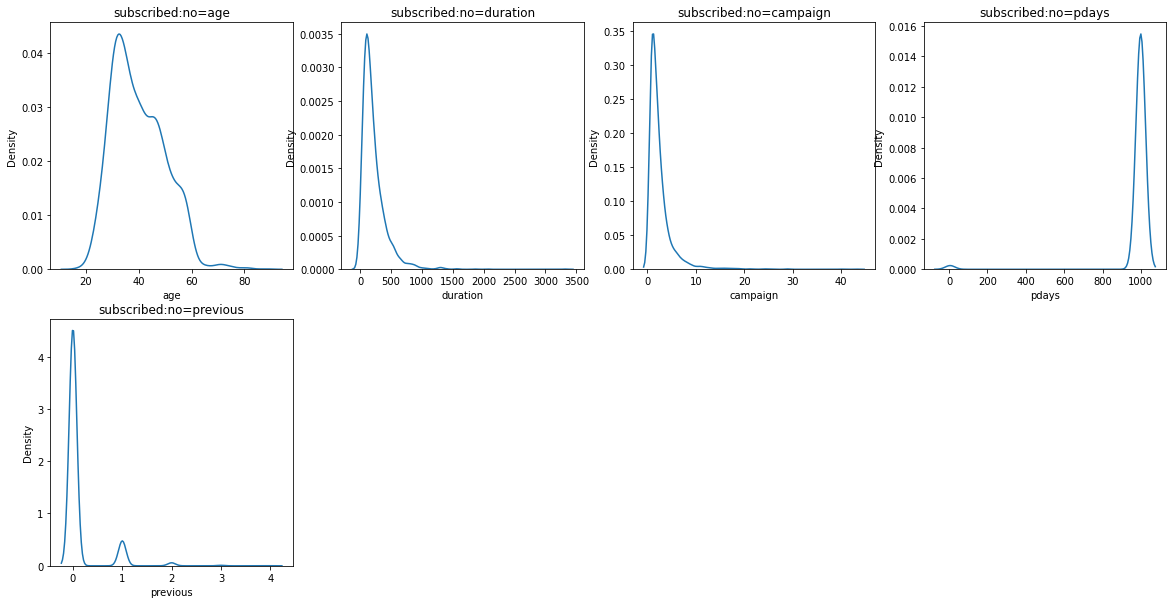

In [ ]:
##Source code: Professor Srikumar Krishnamoorthy-IIMA Faculty
fig = plt.figure(figsize=(20,10))
i = 1
for k in mylist:
    plt.subplot(2, 4, i)
    i += 1
    x = dataset[[k, 'subscribed']]
    y = x.loc[dataset.subscribed == 'no', ]
    sns.kdeplot(y.iloc[:, 0])
    plt.title("subscribed:no="+str(k))

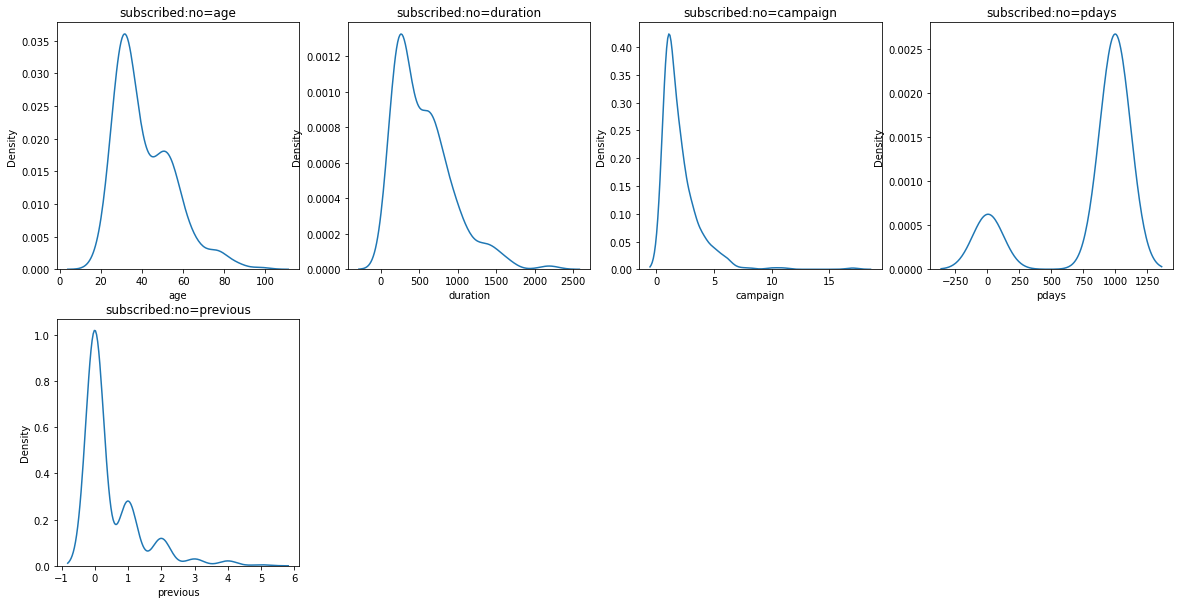

In [ ]:
##Source code: Professor Srikumar Krishnamoorthy-IIMA Faculty
fig = plt.figure(figsize=(20,10))
i = 1
for k in mylist:
    plt.subplot(2, 4, i)
    i += 1
    x = dataset[[k, 'subscribed']]
    y = x.loc[dataset.subscribed == 'yes', ]
    sns.kdeplot(y.iloc[:, 0])
    plt.title("subscribed:no="+str(k))

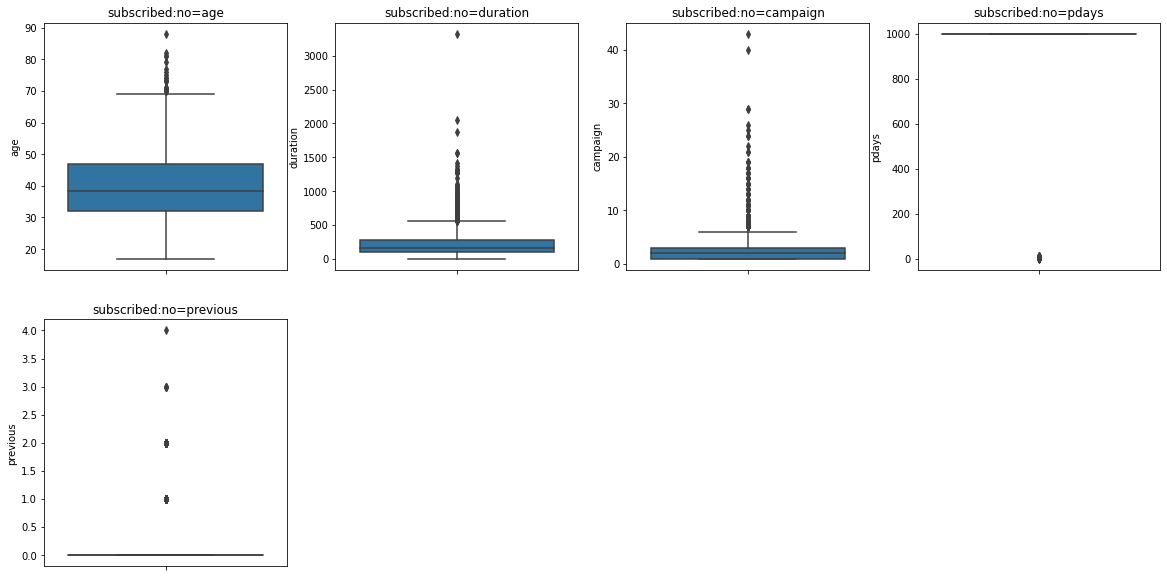

In [ ]:
##Source code: Professor Srikumar Krishnamoorthy-IIMA Faculty
fig = plt.figure(figsize=(20,10))
i = 1
for k in mylist:
    plt.subplot(2, 4, i)
    i += 1
    x = dataset[[k, 'subscribed']]
    y = x.loc[dataset.subscribed == 'no', ]
    sns.boxplot(y=y.iloc[:, 0])
    plt.title("subscribed:no="+str(k))

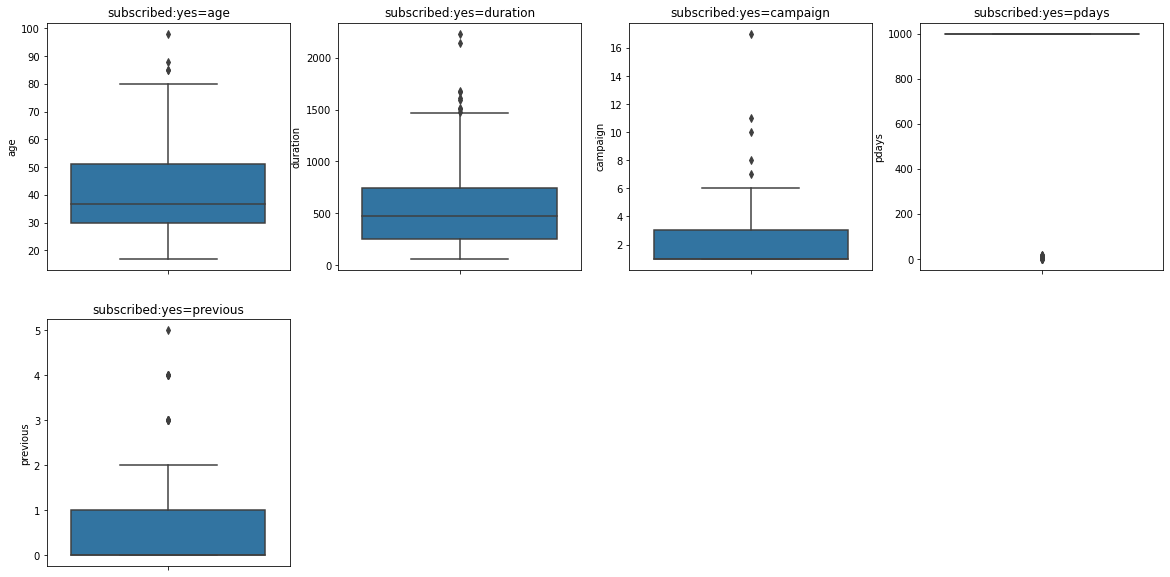

In [ ]:
##Source code: Professor Srikumar Krishnamoorthy-IIMA Faculty
fig = plt.figure(figsize=(20,10))
i = 1
for k in mylist:
    plt.subplot(2, 4, i)
    i += 1
    x = dataset[[k, 'subscribed']]
    y = x.loc[dataset.subscribed == 'yes', ]
    sns.boxplot(y=y.iloc[:, 0])
    plt.title("subscribed:yes="+str(k))

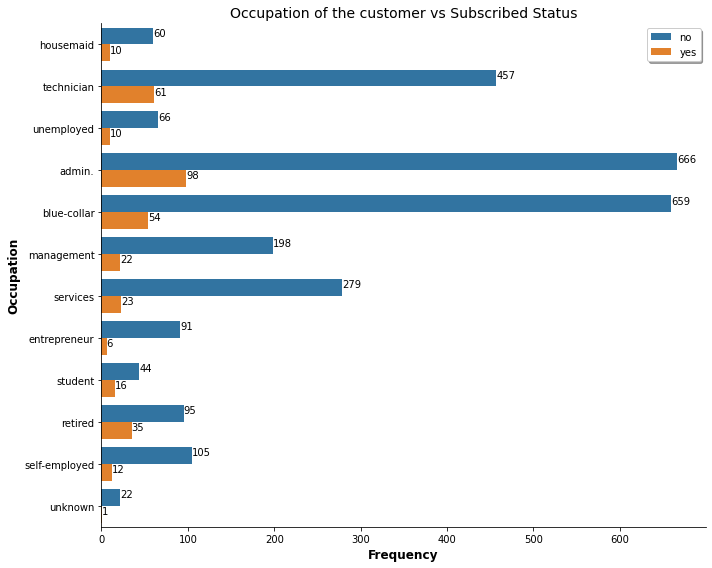

In [ ]:
fig, axes = plt.subplots(figsize=(10,8))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(y='occupation', data=dataset, hue='subscribed', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Occupation of the customer vs Subscribed Status', fontsize=14)
axes.set_ylabel('Occupation', fontsize=12, weight='bold')
axes.set_xlabel('Frequency', fontsize=12, weight='bold')

for p in splot.patches:
    count =format(p.get_width(), '.0f')
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    splot.annotate(count,(x,y))
    
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

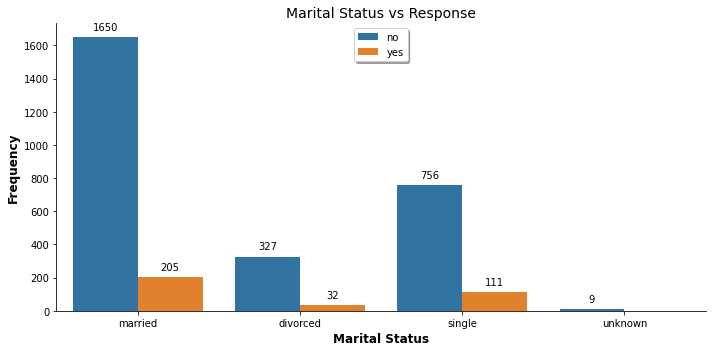

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='maritalStatus', data=dataset, hue='subscribed', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Marital Status vs Response', fontsize=14)
axes.set_xlabel('Marital Status', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

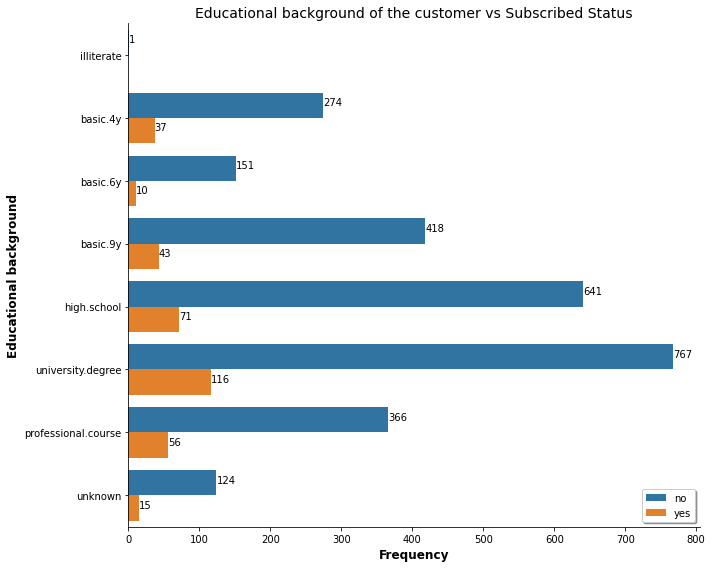

In [ ]:
fig, axes = plt.subplots(figsize=(10,8))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(y='education', data=dataset, hue='subscribed', ax=axes, 
                      order=['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree',
                      'professional.course', 'unknown']);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Educational background of the customer vs Subscribed Status', fontsize=14)
axes.set_ylabel('Educational background', fontsize=12, weight='bold')
axes.set_xlabel('Frequency', fontsize=12, weight='bold')

for p in splot.patches:
    count =format(p.get_width(), '.0f')
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    splot.annotate(count,(x,y))

axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

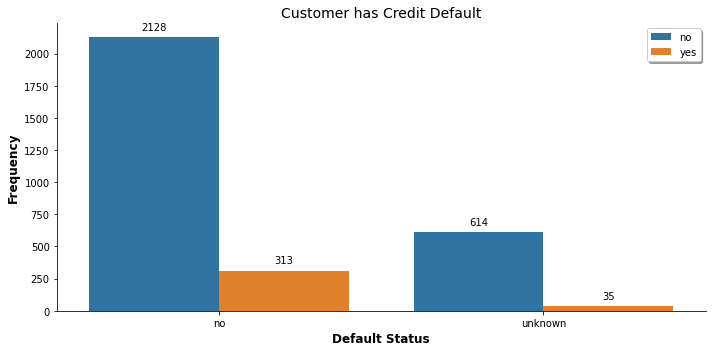

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='creditDefault', data=dataset, hue='subscribed', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Customer has Credit Default', fontsize=14)
axes.set_xlabel('Default Status', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

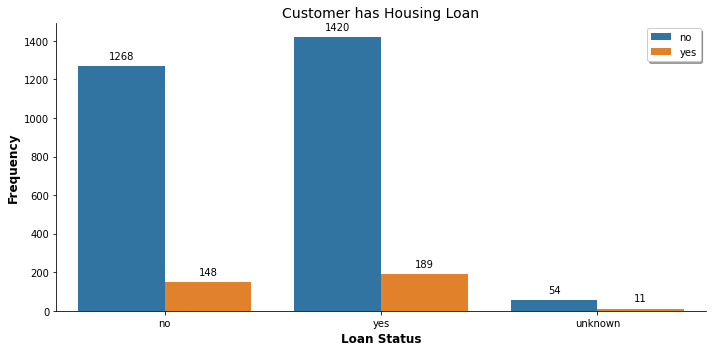

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='housingLoan', data=dataset, hue='subscribed', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Customer has Housing Loan', fontsize=14)
axes.set_xlabel('Loan Status', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

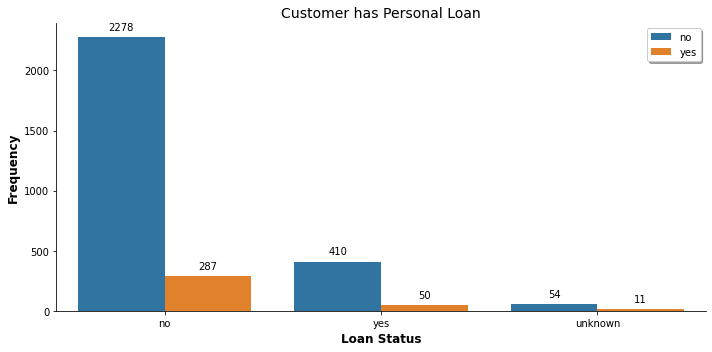

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='personalLoan', data=dataset, hue='subscribed', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Customer has Personal Loan', fontsize=14)
axes.set_xlabel('Loan Status', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

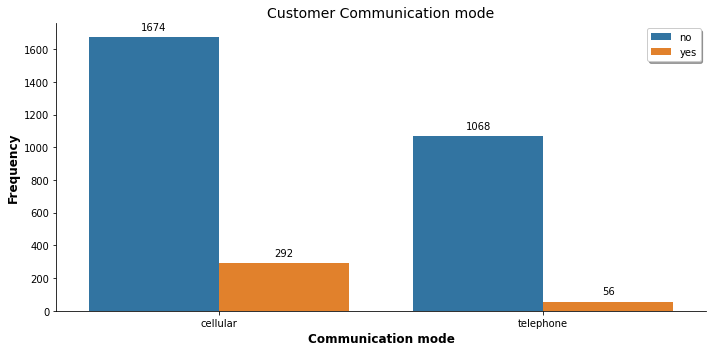

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='contactMode', data=dataset, hue='subscribed', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Customer Communication mode', fontsize=14)
axes.set_xlabel('Communication mode', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

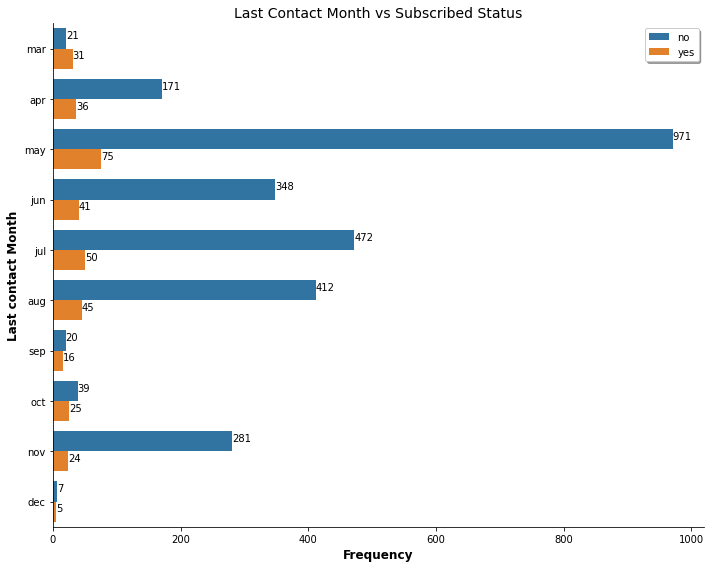

In [ ]:
fig, axes = plt.subplots(figsize=(10,8))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(y='month', data=dataset, hue='subscribed', ax=axes,
                     order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Last Contact Month vs Subscribed Status', fontsize=14)
axes.set_ylabel('Last contact Month', fontsize=12, weight='bold')
axes.set_xlabel('Frequency', fontsize=12, weight='bold')

for p in splot.patches:
    count =format(p.get_width(), '.0f')
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    splot.annotate(count,(x,y))

axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

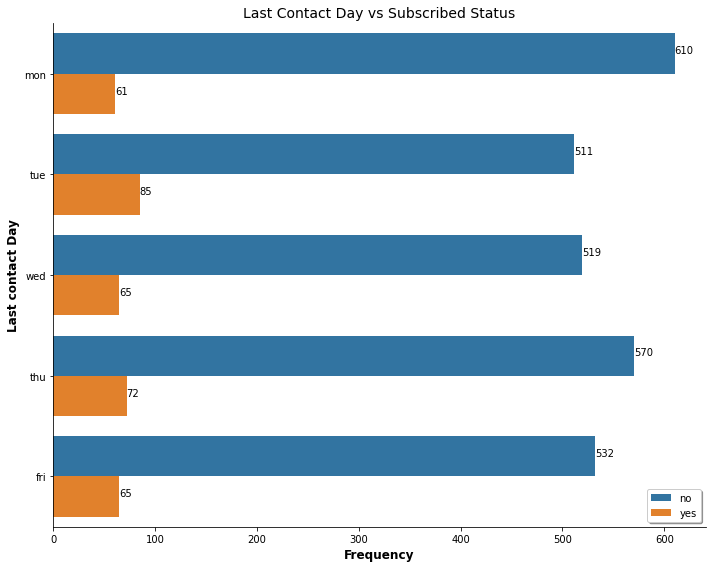

In [ ]:
fig, axes = plt.subplots(figsize=(10,8))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(y='dayOfWeek', data=dataset, hue='subscribed', ax=axes,
                     order=['mon', 'tue', 'wed', 'thu', 'fri']);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Last Contact Day vs Subscribed Status', fontsize=14)
axes.set_ylabel('Last contact Day', fontsize=12, weight='bold')
axes.set_xlabel('Frequency', fontsize=12, weight='bold')

for p in splot.patches:
    count =format(p.get_width(), '.0f')
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    splot.annotate(count,(x,y))

axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

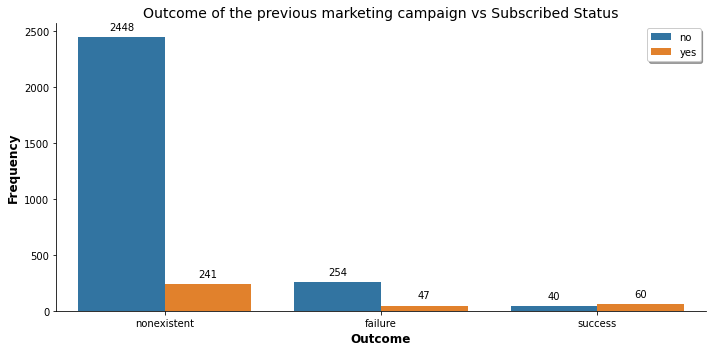

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='poutcome', data=dataset, hue='subscribed', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Outcome of the previous marketing campaign vs Subscribed Status', fontsize=14)
axes.set_xlabel('Outcome', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

In [ ]:
dataset.previous.value_counts().sort_index()

0    2689
1     323
2      59
3      12
4       6
5       1
Name: previous, dtype: int64

In [ ]:
dataset.previous.astype("str")

0       0
1       0
2       0
3       0
4       1
       ..
3085    0
3086    0
3087    0
3088    1
3089    0
Name: previous, Length: 3090, dtype: object

In [ ]:
previous_mapping = {0:"Zero", 1:"One", 2:"Two", 3:"Three", 4:"Four", 5:"Five"}
dataset["previous_"] = dataset.previous.map(previous_mapping)

In [ ]:
dataset.head()

,age,occupation,maritalStatus,education,creditDefault,housingLoan,personalLoan,contactMode,month,dayOfWeek,duration,campaign,pdays,previous,poutcome,subscribed,previous_
0,54,housemaid,married,basic.9y,no,no,no,cellular,nov,wed,362,3,999,0,nonexistent,no,Zero
1,62,technician,married,unknown,no,no,no,cellular,mar,mon,105,2,999,0,nonexistent,no,Zero
2,58,unemployed,divorced,high.school,no,no,no,cellular,jul,mon,377,4,999,0,nonexistent,no,Zero
3,25,admin.,single,university.degree,no,yes,no,cellular,jul,thu,174,2,999,0,nonexistent,no,Zero
4,29,admin.,married,high.school,no,yes,yes,cellular,nov,mon,58,1,999,1,failure,no,One


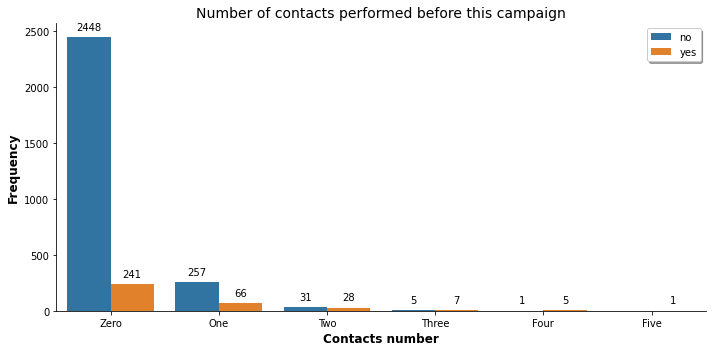

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='previous_', data=dataset, hue='subscribed', ax=axes,
                     order=["Zero", "One", "Two", "Three", "Four", "Five"]);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Number of contacts performed before this campaign', fontsize=14)
axes.set_xlabel('Contacts number', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='upper right', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

In [ ]:
dataset.pdays.value_counts().sort_index()

1         2
2         9
3        28
4        13
5         4
6        29
7         1
8         1
9         5
10        4
11        3
12        3
13        3
14        1
15        1
17        1
18        1
999    2981
Name: pdays, dtype: int64

In [ ]:
customer_mapping = {"no":0, "yes":1}
dataset["target"] = dataset.subscribed.map(customer_mapping)

In [ ]:
dataset.target.value_counts().sort_index()

0    2742
1     348
Name: target, dtype: int64

In [ ]:
dataset.drop(["subscribed", "previous"], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = dataset.loc[:, ["target"]]
X = dataset.loc[:, ['age', 'occupation', 'maritalStatus', 'education', 'creditDefault',
       'housingLoan', 'personalLoan', 'contactMode', 'month', 'dayOfWeek',
       'duration', 'campaign', 'pdays', 'previous_', 'poutcome']]

##Push 40% to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1854, 15), (1236, 15), (1854, 1), (1236, 1))

In [ ]:
##!pip install feature_engine
from feature_engine.outlier_removers import Winsorizer

In [ ]:
windsoriser = Winsorizer(distribution='quantiles',
                          tail='both',
                          fold=0.05,
                          variables=['age', 'duration', 'campaign'])

In [ ]:
windsoriser.fit(X_train)

Winsorizer(distribution='quantiles', fold=0.05, missing_values='raise',
           tail='both', variables=['age', 'duration', 'campaign'])

In [ ]:
X_train1 = windsoriser.transform(X_train)
X_test1 = windsoriser.transform(X_test)

In [ ]:
from feature_engine.discretisers import EqualWidthDiscretiser

In [ ]:
eqfdisctr1 = EqualWidthDiscretiser(bins=10, variables = ['age', 'duration', 'campaign', 'pdays'], return_object=True)

In [ ]:
eqfdisctr1.fit(X_train1)

EqualWidthDiscretiser(bins=10, return_boundaries=False, return_object=True,
                      variables=['age', 'duration', 'campaign', 'pdays'])

In [ ]:
X_train2 = eqfdisctr1.transform(X_train1)
X_test2 = eqfdisctr1.transform(X_test1)

In [ ]:
X_train2.pdays.value_counts().sort_index()

0      60
9    1794
Name: pdays, dtype: int64

In [ ]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 665 to 2732
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            1854 non-null   object
 1   occupation     1854 non-null   object
 2   maritalStatus  1854 non-null   object
 3   education      1854 non-null   object
 4   creditDefault  1854 non-null   object
 5   housingLoan    1854 non-null   object
 6   personalLoan   1854 non-null   object
 7   contactMode    1854 non-null   object
 8   month          1854 non-null   object
 9   dayOfWeek      1854 non-null   object
 10  duration       1854 non-null   object
 11  campaign       1854 non-null   object
 12  pdays          1854 non-null   object
 13  previous_      1854 non-null   object
 14  poutcome       1854 non-null   object
dtypes: object(15)
memory usage: 231.8+ KB


Text(0, 0.5, 'Number of observations per bin')

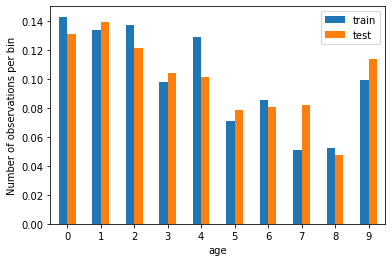

In [ ]:
t1 = X_train2.groupby(['age'])['age'].count() / len(X_train2)
t2 = X_test2.groupby(['age'])['age'].count() / len(X_test2)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

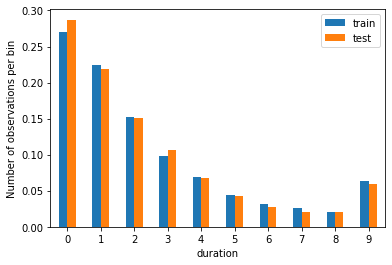

In [ ]:
t1 = X_train2.groupby(['duration'])['duration'].count() / len(X_train2)
t2 = X_test2.groupby(['duration'])['duration'].count() / len(X_test2)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

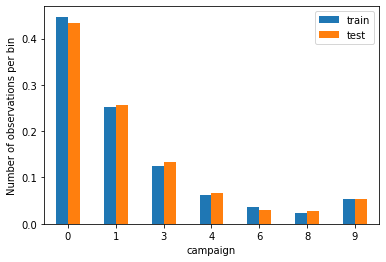

In [ ]:
t1 = X_train2.groupby(['campaign'])['campaign'].count() / len(X_train2)
t2 = X_test2.groupby(['campaign'])['campaign'].count() / len(X_test2)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

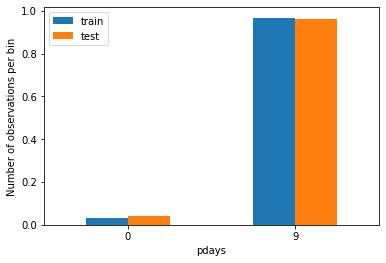

In [ ]:
t1 = X_train2.groupby(['pdays'])['pdays'].count() / len(X_train2)
t2 = X_test2.groupby(['pdays'])['pdays'].count() / len(X_test2)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

In [ ]:
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder

In [ ]:
rare_label_encoder = RareLabelCategoricalEncoder(
    tol=0.01,
    n_categories=2,
    variables=['age', 'occupation', 'maritalStatus', 'education', 'creditDefault', 'housingLoan', 'personalLoan',
              'contactMode', 'month', 'dayOfWeek', 'duration', 'campaign', 'pdays', 'previous_', 'poutcome']
)

rare_label_encoder.fit(X_train2)

X_train3 = eqfdisctr1.transform(X_train2)
X_test3 = eqfdisctr1.transform(X_test2)

/usr/local/lib/python3.6/dist-packages/feature_engine/categorical_encoders.py:786: UserWarning: The number of unique categories for variable creditDefault is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, all categories will be considered frequent".format(var))
/usr/local/lib/python3.6/dist-packages/feature_engine/categorical_encoders.py:786: UserWarning: The number of unique categories for variable contactMode is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, all categories will be considered frequent".format(var))
/usr/local/lib/python3.6/dist-packages/feature_engine/categorical_encoders.py:786: UserWarning: The number of unique categories for variable pdays is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, all categories will be considered frequent".format(var))


In [ ]:
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [ ]:
ordered_label_encoder = OrdinalCategoricalEncoder(
    encoding_method='ordered',
    variables=['age', 'occupation', 'maritalStatus', 'education', 'creditDefault', 'housingLoan', 'personalLoan',
              'contactMode', 'month', 'dayOfWeek', 'duration', 'campaign', 'pdays', 'previous_', 'poutcome'])

In [ ]:
ordered_label_encoder.fit(X_train3, y_train)

OrdinalCategoricalEncoder(encoding_method='ordered',
                          variables=['age', 'occupation', 'maritalStatus',
                                     'education', 'creditDefault',
                                     'housingLoan', 'personalLoan',
                                     'contactMode', 'month', 'dayOfWeek',
                                     'duration', 'campaign', 'pdays',
                                     'previous_', 'poutcome'])

In [ ]:
ordered_label_encoder.encoder_dict_

{'age': {0: 0},
 'campaign': {0: 4, 3: 2, 4: 1, 8: 3, 9: 0},
 'contactMode': {'cellular': 1, 'telephone': 0},
 'creditDefault': {'no': 1, 'unknown': 0},
 'dayOfWeek': {'fri': 2, 'mon': 0, 'thu': 3, 'tue': 4, 'wed': 1},
 'duration': {0: 0},
 'education': {'basic.4y': 7,
  'basic.6y': 1,
  'basic.9y': 3,
  'high.school': 4,
  'illiterate': 0,
  'professional.course': 5,
  'university.degree': 6,
  'unknown': 2},
 'housingLoan': {'no': 2, 'unknown': 0, 'yes': 1},
 'maritalStatus': {'divorced': 1, 'married': 2, 'single': 3, 'unknown': 0},
 'month': {'apr': 5,
  'aug': 3,
  'dec': 8,
  'jul': 4,
  'jun': 2,
  'mar': 9,
  'may': 0,
  'nov': 1,
  'oct': 6,
  'sep': 7},
 'occupation': {'admin.': 9,
  'blue-collar': 1,
  'entrepreneur': 2,
  'housemaid': 8,
  'management': 4,
  'retired': 11,
  'self-employed': 3,
  'services': 5,
  'student': 10,
  'technician': 7,
  'unemployed': 6,
  'unknown': 0},
 'pdays': {0: 0},
 'personalLoan': {'no': 2, 'unknown': 1, 'yes': 0},
 'poutcome': {'failure':

In [ ]:
ordered_label_encoder.variables

['age',
 'occupation',
 'maritalStatus',
 'education',
 'creditDefault',
 'housingLoan',
 'personalLoan',
 'contactMode',
 'month',
 'dayOfWeek',
 'duration',
 'campaign',
 'pdays',
 'previous_',
 'poutcome']

In [ ]:
X_train4 = ordered_label_encoder.transform(X_train3)
X_test4 = ordered_label_encoder.transform(X_test3)

In [ ]:
##Import stats and ML modules
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()
sc.fit(X_train4)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train5 = sc.transform(X_train4)
X_test5 = sc.transform(X_test4)

In [ ]:
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from pprint import pprint

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_precision_recall_curve

**Logistic Regression Classifier**

In [ ]:
##Invoke logistic regression classifier with weights
estimator = LogisticRegression(random_state=1, class_weight={0:1, 1:3})

In [ ]:
penalty = ["l1", "l2"]
solver = ["newton-cg", "lbfgs"]

param_grid = {'penalty': penalty,
              'solver': solver}

pprint(param_grid)

{'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs']}


In [ ]:
##https://scikit-learn.org/stable/modules/model_evaluation.html
randomized_accuracy_fit = RandomizedSearchCV(estimator=estimator,
                                            param_distributions=param_grid,
                                            n_iter=50,
                                            scoring="f1_micro",
                                            n_jobs=-1,
                                            refit=True,
                                            random_state=123,
                                            return_train_score=True,
                                            verbose=1,
                                            cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
                                            )

In [ ]:
training_start = time.perf_counter()
randomized_accuracy_fit.fit(X_train5, y_train)
training_end = time.perf_counter()
train_time = training_end-training_start
print("Time consumed for training: %4.3f seconds" % (train_time))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Time consumed for training: 2.017 seconds


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(randomized_accuracy_fit.best_score_)
print(randomized_accuracy_fit.best_estimator_)

0.8775675675675675
LogisticRegression(C=1.0, class_weight={0: 1, 1: 3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
classifier_logit = LogisticRegression(
    solver='newton-cg',
    penalty='l2',
    random_state=1,
    n_jobs=-1,
    class_weight={0:1, 1:3})

In [ ]:
##Fit to train data
classifier_logit.fit(X_train5, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight={0: 1, 1: 3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
##Predict train set
train_predictions = classifier_logit.predict_proba(X_train5)
##Predict test set
test_predictions = classifier_logit.predict_proba(X_test5)

In [ ]:
##Store prediction classes
# predictions = classifier_logit.predict(X_test5)

In [ ]:
##Result of train Confusion matrix
print(confusion_matrix(y_train, classifier_logit.predict(X_train5)))

[[1572   71]
 [ 153   58]]


In [ ]:
cost_list = list()
x_list = list()
sen_list = list()
spec_list = list()
for i in np.linspace(0,1,20,endpoint=False):
    test_matrix = confusion_matrix(y_test.values, (test_predictions[:, 1]>i).astype(int).reshape(-1,1), labels=[0,1])
    ###Test metrics
    TP = test_matrix[1,1]
    TN = test_matrix[0,0]
    FN = test_matrix[0,1]
    FP = test_matrix[1,0]
    Recall_1 = round(TP/(TP+FN),3)
    Recall_0 = round(TN/(TN+FP),3)
    cost = round((FP*1) + (FN*3),3)
    x = round(i,2)
    x_list.append(x)
    cost_list.append(cost)
    sen_list.append(Recall_1)
    spec_list.append(Recall_0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


In [ ]:
a = pd.DataFrame(x_list, columns=["Cutoff"])
b = pd.DataFrame(cost_list, columns=["Cost"])
c = pd.DataFrame(sen_list, columns=["Sensitivity"])
d = pd.DataFrame(spec_list, columns=["Specificity"])
e = pd.concat([a, b, c, d], axis='columns')
e.replace(np.nan,0, inplace=True)

In [ ]:
e.Cutoff[e.Cost==e.Cost.min()].values

array([0.9 , 0.95])

In [ ]:
e

,Cutoff,Cost,Sensitivity,Specificity
0,0.00,3297,0.111,0.000
1,0.05,3247,0.112,0.944
2,0.10,2790,0.124,0.966
3,0.15,2191,0.143,0.959
4,0.20,1710,0.167,0.957
5,0.25,1331,0.183,0.942
6,0.30,985,0.220,0.941
7,0.35,698,0.261,0.935
8,0.40,476,0.311,0.926
9,0.45,327,0.373,0.919


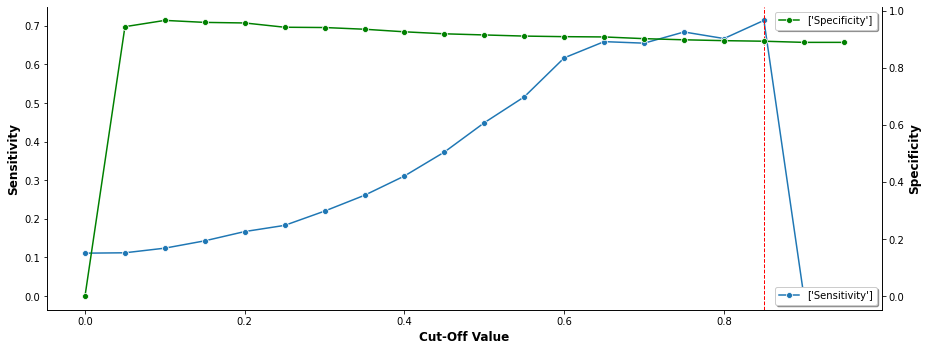

In [ ]:
fig, ax1 = plt.subplots(figsize=(13,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Cutoff', y='Sensitivity', data=e, marker="o", ax=ax1, label=['Sensitivity'])
ax1.legend(loc='lower right', shadow=True,fontsize='medium')
ax1.axvline(x=0.85, color='red', linestyle='dashed', linewidth=1)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Cut-Off Value', fontsize=12, weight='bold')
ax1.set_ylabel('Sensitivity', fontsize=12, weight='bold')

ax2 = ax1.twinx()

sns.lineplot(x='Cutoff', y='Specificity', data=e, marker="o", ax=ax2, label=['Specificity'], color='green')
ax2.legend(loc='best', shadow=True,fontsize='medium');
ax2.spines['top'].set_visible(False)

ax2.set_ylabel('Specificity', fontsize=12, weight='bold')

fig.tight_layout()
plt.show()

In [ ]:
print(e.Cutoff[e.Cost==e.Cost.min()].values)

[0.9  0.95]


In [ ]:
confusion_matrix(y_test.values, (test_predictions[:, 1]>0.85).astype(int).reshape(-1,1), labels=[0,1])

array([[1097,    2],
       [ 132,    5]])

In [ ]:
test_matrix = confusion_matrix(y_test.values, (test_predictions[:, 1]>0.85).astype(int).reshape(-1,1), labels=[0,1])###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]
test_recall = round(TP/(TP+FN),3)
test_precision = round(TP/(TP+FP),3)
print(f"Test Recall for Subscribed=Yes is {test_recall} and Test Precision is {test_precision}")

Test Recall for Subscribed=Yes is 0.714 and Test Precision is 0.036


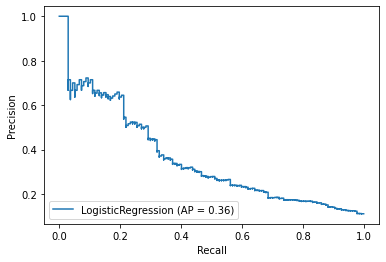

In [ ]:
prcurve_logit = plot_precision_recall_curve(classifier_logit, X_test5, y_test)

In [ ]:
pred_data = pd.DataFrame(test_predictions[:, 1], columns=["Predicted_Probability"])
test_labels = y_test.reset_index()
pred_data = pd.merge(test_labels, pred_data, left_index=True, right_index=True)
pred_data = pred_data[["target", "Predicted_Probability"]]
pred_data = pred_data.sort_values(by=['Predicted_Probability'], ascending=False)
pred_data = pred_data.reset_index(drop="index")

In [ ]:
row_index = np.int(np.ceil(pred_data.shape[0] * 0.10))

In [ ]:
##First 10% of rows cover this many subscribers
round((pred_data.iloc[:row_index+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.10,3)

3.431

In [ ]:
##First 20% of rows cover this many subscribers
round((pred_data.iloc[:row_index+row_index+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.20,3)

2.518

In [ ]:
##First 30% of rows cover this many subscribers
round((pred_data.iloc[:row_index+row_index+row_index+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.30,3)

2.068

In [ ]:
##First 90% of rows cover this many subscribers
round((pred_data.iloc[:(row_index*9)+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.90,3)

1.087

In [ ]:
del test_labels, pred_data

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
##Invoke Random Forest classifier with weights
estimator = RandomForestClassifier(random_state=2, max_features='auto', class_weight={0:1, 1:3})

In [ ]:
##https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
n_estimators = [100, 200, 300, 400, 500]
criterion = ["gini", "entropy"]
max_depth = [10, 20, 30, 40, 50, 60, 70]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# class_weight={0:1, 1:3}

param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap
             }

# from pprint import pprint
pprint(param_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500]}


In [ ]:
training_start = time.perf_counter()
randomized_accuracy_fit.fit(X_train5, y_train)
training_end = time.perf_counter()
train_time = training_end-training_start
print("Time consumed for training: %4.3f seconds" % (train_time))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Time consumed for training: 0.511 seconds


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(randomized_accuracy_fit.best_score_)
print(randomized_accuracy_fit.best_estimator_)

0.8775675675675675
LogisticRegression(C=1.0, class_weight={0: 1, 1: 3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
classifier_rf = RandomForestClassifier(random_state=2, max_features='auto', class_weight={0:1, 1:3},
                                      criterion='entropy', max_depth=10, min_samples_split=5, n_estimators=300)

In [ ]:
##Fit to train data
classifier_rf.fit(X_train5, y_train)
##Predict train set
train_predictions = classifier_rf.predict_proba(X_train5)
##Predict test set
test_predictions = classifier_rf.predict_proba(X_test5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
cost_list = list()
x_list = list()
sen_list = list()
spec_list = list()
for i in np.linspace(0,1,30,endpoint=False):
    test_matrix = confusion_matrix(y_test.values, (test_predictions[:, 1]>i).astype(int).reshape(-1,1), labels=[0,1])
    ###Test metrics
    TP = test_matrix[1,1]
    TN = test_matrix[0,0]
    FN = test_matrix[0,1]
    FP = test_matrix[1,0]
    Recall_1 = round(TP/(TP+FN),3)
    Recall_0 = round(TN/(TN+FP),3)
    cost = round((FP*1) + (FN*3),3)
    x = round(i,2)
    x_list.append(x)
    cost_list.append(cost)
    sen_list.append(Recall_1)
    spec_list.append(Recall_0)
    
a = pd.DataFrame(x_list, columns=["Cutoff"])
b = pd.DataFrame(cost_list, columns=["Cost"])
c = pd.DataFrame(sen_list, columns=["Sensitivity"])
d = pd.DataFrame(spec_list, columns=["Specificity"])
e = pd.concat([a, b, c, d], axis='columns')
e.replace(np.nan,0, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


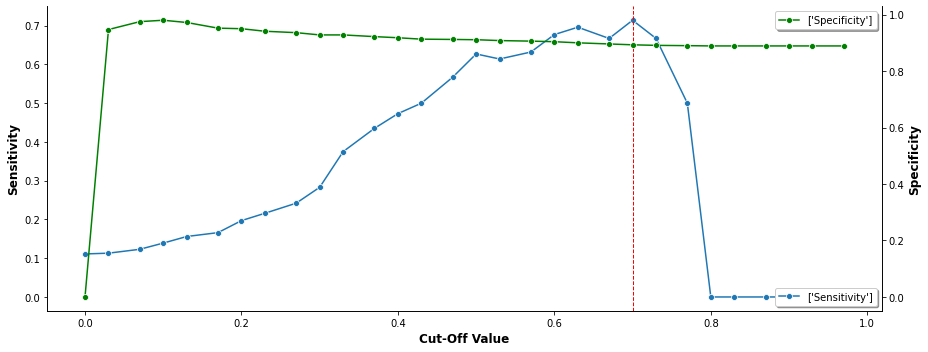

In [ ]:
fig, ax1 = plt.subplots(figsize=(13,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Cutoff', y='Sensitivity', data=e, marker="o", ax=ax1, label=['Sensitivity'])
ax1.legend(loc='lower right', shadow=True,fontsize='medium')
ax1.axvline(x=0.70, color='red', linestyle='dashed', linewidth=1)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Cut-Off Value', fontsize=12, weight='bold')
ax1.set_ylabel('Sensitivity', fontsize=12, weight='bold')

ax2 = ax1.twinx()

sns.lineplot(x='Cutoff', y='Specificity', data=e, marker="o", ax=ax2, label=['Specificity'], color='green')
ax2.legend(loc='best', shadow=True,fontsize='medium');
ax2.spines['top'].set_visible(False)

ax2.set_ylabel('Specificity', fontsize=12, weight='bold')

fig.tight_layout()
plt.show()

In [ ]:
confusion_matrix(y_test.values, (test_predictions[:, 1]>0.70).astype(int).reshape(-1,1), labels=[0,1])

array([[1097,    2],
       [ 132,    5]])

In [ ]:
test_matrix = confusion_matrix(y_test.values, (test_predictions[:, 1]>0.70).astype(int).reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]
test_recall = round(TP/(TP+FN),3)
test_precision = round(TP/(TP+FP),3)
print(f"Test Recall for Subscribed=Yes is {test_recall} and Test Precision is {test_precision}")

Test Recall for Subscribed=Yes is 0.714 and Test Precision is 0.036


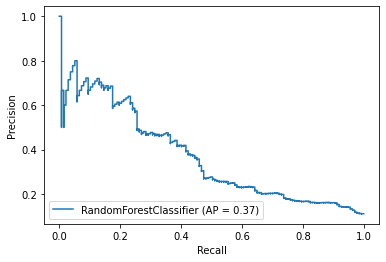

In [ ]:
prcurve_rf = plot_precision_recall_curve(classifier_rf, X_test5, y_test)

In [ ]:
pred_data = pd.DataFrame(test_predictions[:, 1], columns=["Predicted_Probability"])
test_labels = y_test.reset_index()
pred_data = pd.merge(test_labels, pred_data, left_index=True, right_index=True)
pred_data = pred_data[["target", "Predicted_Probability"]]
pred_data = pred_data.sort_values(by=['Predicted_Probability'], ascending=False)
pred_data = pred_data.reset_index(drop="index")

In [ ]:
row_index = np.int(np.ceil(pred_data.shape[0] * 0.10))

In [ ]:
##First 10% of rows cover this many subscribers
round((pred_data.iloc[:row_index+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.10,3)

3.869

In [ ]:
##First 20% of rows cover this many subscribers
round((pred_data.iloc[:row_index+row_index+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.20,3)

2.518

In [ ]:
##First 30% of rows cover this many subscribers
round((pred_data.iloc[:row_index+row_index+row_index+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.30,3)

2.092

In [ ]:
##First 90% of rows cover this many subscribers
round((pred_data.iloc[:(row_index*9)+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.90,3)

1.079

In [ ]:
del test_labels, pred_data

**Extreme Gradient Boosting**

In [ ]:
#pip install xgboost
import xgboost as xgb

In [ ]:
estimator = xgb.XGBClassifier(objective="binary:logistic", random_state=1)

In [ ]:
learning_rate = np.arange(0.01,1,0.05)
n_estimators = np.arange(100, 500, 50)
max_depth = [2, 5, 10, 20, 30, 40, 50]
min_child_weight = [1,3,6]
colsample_bytree = [0.1, 0.5, 0.8, 1]

param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_child_weight': min_child_weight,
              'colsample_bytree': colsample_bytree}

pprint(param_grid)

{'colsample_bytree': [0.1, 0.5, 0.8, 1],
 'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
 'max_depth': [2, 5, 10, 20, 30, 40, 50],
 'min_child_weight': [1, 3, 6],
 'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])}


In [ ]:
##https://scikit-learn.org/stable/modules/model_evaluation.html
randomized_accuracy_fit = RandomizedSearchCV(estimator=estimator,
                                            param_distributions=param_grid,
                                            n_iter=50,
                                            scoring="f1_micro",
                                            n_jobs=-1,
                                            refit=True,
                                            random_state=2,
                                            return_train_score=True,
                                            verbose=1,
                                            cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
                                            )

In [ ]:
training_start = time.perf_counter()
randomized_accuracy_fit.fit(X_train5, y_train)
training_end = time.perf_counter()
train_time = training_end-training_start
print("Time consumed for training: %4.3f seconds" % (train_time))

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min


Time consumed for training: 197.624 seconds


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(randomized_accuracy_fit.best_score_)
print(randomized_accuracy_fit.best_estimator_)

0.89050566695728
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.56, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
classifier_xgboost = xgb.XGBClassifier(objective="binary:logistic", random_state=1,
                                      learning_rate=0.01, n_estimators=100, max_depth=20,
                                      min_child_weight=1, colsample_bytree=0.8)

In [ ]:
##Fit to train data
classifier_xgboost.fit(X_train5, y_train)
##Predict train set
train_predictions = classifier_xgboost.predict_proba(X_train5)
##Predict test set
test_predictions = classifier_xgboost.predict_proba(X_test5)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cost_list = list()
x_list = list()
sen_list = list()
spec_list = list()
for i in np.linspace(0,1,30,endpoint=False):
    test_matrix = confusion_matrix(y_test.values, (test_predictions[:, 1]>i).astype(int).reshape(-1,1), labels=[0,1])
    ###Test metrics
    TP = test_matrix[1,1]
    TN = test_matrix[0,0]
    FN = test_matrix[0,1]
    FP = test_matrix[1,0]
    Recall_1 = round(TP/(TP+FN),3)
    Recall_0 = round(TN/(TN+FP),3)
    cost = round((FP*1) + (FN*3),3)
    x = round(i,2)
    x_list.append(x)
    cost_list.append(cost)
    sen_list.append(Recall_1)
    spec_list.append(Recall_0)
    
a = pd.DataFrame(x_list, columns=["Cutoff"])
b = pd.DataFrame(cost_list, columns=["Cost"])
c = pd.DataFrame(sen_list, columns=["Sensitivity"])
d = pd.DataFrame(spec_list, columns=["Specificity"])
e = pd.concat([a, b, c, d], axis='columns')
e.replace(np.nan,0, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


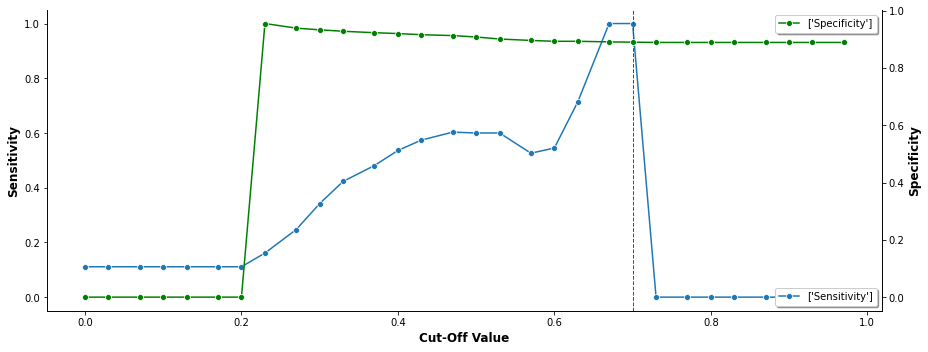

In [ ]:
fig, ax1 = plt.subplots(figsize=(13,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Cutoff', y='Sensitivity', data=e, marker="o", ax=ax1, label=['Sensitivity'])
ax1.legend(loc='lower right', shadow=True,fontsize='medium')
ax1.axvline(x=0.70, color='red', linestyle='dashed', linewidth=1)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Cut-Off Value', fontsize=12, weight='bold')
ax1.set_ylabel('Sensitivity', fontsize=12, weight='bold')

ax2 = ax1.twinx()

sns.lineplot(x='Cutoff', y='Specificity', data=e, marker="o", ax=ax2, label=['Specificity'], color='green')
ax2.legend(loc='best', shadow=True,fontsize='medium');
ax2.spines['top'].set_visible(False)

ax2.set_ylabel('Specificity', fontsize=12, weight='bold')

fig.tight_layout()
plt.show()

In [ ]:
confusion_matrix(y_test.values, (test_predictions[:, 1]>0.70).astype(int).reshape(-1,1), labels=[0,1])

array([[1099,    0],
       [ 136,    1]])

In [ ]:
test_matrix = confusion_matrix(y_test.values, (test_predictions[:, 1]>0.70).astype(int).reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]
test_recall = round(TP/(TP+FN),3)
test_precision = round(TP/(TP+FP),3)
print(f"Test Recall for Subscribed=Yes is {test_recall} and Test Precision is {test_precision}")

Test Recall for Subscribed=Yes is 1.0 and Test Precision is 0.007


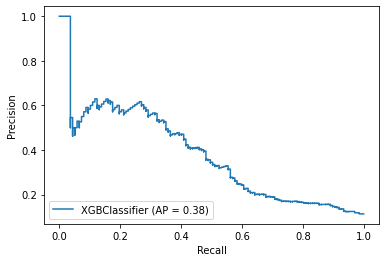

In [ ]:
prcurve_xgboost = plot_precision_recall_curve(classifier_xgboost, X_test5, y_test)

In [ ]:
pred_data = pd.DataFrame(test_predictions[:, 1], columns=["Predicted_Probability"])
test_labels = y_test.reset_index()
pred_data = pd.merge(test_labels, pred_data, left_index=True, right_index=True)
pred_data = pred_data[["target", "Predicted_Probability"]]
pred_data = pred_data.sort_values(by=['Predicted_Probability'], ascending=False)
pred_data = pred_data.reset_index(drop="index")

In [ ]:
row_index = np.int(np.ceil(pred_data.shape[0] * 0.10))

In [ ]:
##First 10% of rows cover this many subscribers
round((pred_data.iloc[:row_index+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.10,3)

4.088

In [ ]:
##First 20% of rows cover this many subscribers
round((pred_data.iloc[:row_index+row_index+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.20,3)

2.81

In [ ]:
##First 30% of rows cover this many subscribers
round((pred_data.iloc[:row_index+row_index+row_index+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.30,3)

2.068

In [ ]:
##First 90% of rows cover this many subscribers
round((pred_data.iloc[:(row_index*9)+1, 0].sum()/pred_data.iloc[:, 0].sum())/0.90,3)

1.079

In [ ]:
del test_labels, pred_data

**Thank You**